# Prepare our environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.__version__

'1.3.5'

In [2]:
pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(precision=3)

# Load our clean data

In [3]:
path_file = 'clean_data_bcp.csv'
path_file

'clean_data_bcp.csv'

In [4]:
df_bcp = pd.read_csv(path_file)
df_bcp

,mora_60,dias_atraso_12_meses_antes,situacion_casa,edad,fecha_ingreso_empleo,antiguedad_tc_meses,producto_pasivo_12_meses_antes,ingreso_mensual,monto_linea_tc,monto_saldo_deudor_prom,score_aprob_tc,nro_veces_abono_12m_antes,zona_geografica,riesgos_sbs,nivel_educativo,edad_binned
0,0,235,FAMILIAR,30,2007-06-01,93,5,"3,500.000",0.000,0.000,214,5,Lima,4,PROFESIONAL,joven
1,0,18,FAMILIAR,32,2005-02-01,9,12,900.000,"1,824.670","1,933.750",175,12,La Libertad,1,TECNICO,joven
2,0,0,FAMILIAR,26,2003-08-01,8,2,"2,400.000","2,797.380",188.290,187,0,Lima,0,PROFESIONAL,joven
3,0,0,FAMILIAR,36,2003-07-01,20,12,"2,700.000",0.000,0.000,187,12,Ancash,0,TECNICO,joven
4,0,0,FAMILIAR,46,2006-11-01,0,1,"3,100.000","2,000.000","11,010.650",189,0,Lima,0,TECNICO,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,FAMILIAR,76,2000-01-01,90,12,"30,000.000","58,083.420","19,548.240",225,0,Lima,0,SIN EDUCACION,adulto_mayor
4996,1,0,FAMILIAR,33,2000-02-01,44,12,"30,000.000",339.980,0.000,214,0,Tacna,0,PROFESIONAL,joven
4997,1,0,FAMILIAR,38,1992-09-01,102,12,"8,500.000","72,685.200","57,094.380",197,12,Piura,1,PROFESIONAL,joven
4998,1,0,PROPIA,45,1990-01-01,87,12,"30,000.000","32,161.050","26,901.420",224,12,Lima,0,PROFESIONAL,adulto


In [5]:
df_bcp.shape

(5000, 16)

In [6]:
# describe our numerical data
df_bcp.describe()

,mora_60,dias_atraso_12_meses_antes,edad,antiguedad_tc_meses,producto_pasivo_12_meses_antes,ingreso_mensual,monto_linea_tc,monto_saldo_deudor_prom,score_aprob_tc,nro_veces_abono_12m_antes,riesgos_sbs
count,"5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000","5,000.000"
mean,0.700,4.481,36.429,25.386,10.571,"4,373.572","10,236.736","5,732.438",196.762,7.901,0.564
std,0.458,13.945,9.787,32.014,3.396,"5,393.520","19,853.871","10,869.692",19.416,5.278,0.903
min,0.000,0.000,20.000,0.000,0.000,123.700,0.000,0.000,134.000,0.000,0.000
25%,0.000,0.000,29.000,0.000,12.000,"1,400.000",389.365,283.605,182.000,0.000,0.000
50%,1.000,0.000,34.000,12.000,12.000,"2,400.000","2,915.955","2,077.105",197.000,12.000,0.000
75%,1.000,2.000,42.000,39.000,12.000,"4,900.000","9,763.388","5,384.220",212.000,12.000,1.000
max,1.000,245.000,85.000,130.000,12.000,"30,000.000","121,543.400","57,094.380",266.000,12.000,4.000


In [7]:
# describe our category data
df_bcp.describe(include = ['object'])

,situacion_casa,fecha_ingreso_empleo,zona_geografica,nivel_educativo,edad_binned
count,5000,5000,5000,5000,5000
unique,4,941,25,5,3
top,FAMILIAR,2000-01-01,Lima,PROFESIONAL,joven
freq,3471,144,2948,2666,3659


# Search variables to make prediction

1. Minimizar riesgos
2. Qué clientes tienen alta probabilidad de mora
3. Qué clientes son suceptibles a retrasarse en sus pagos
4. Qué clientes son suceptibles a incumplir sus pagos
5. Dos(2) variables más relevantes
6. Dos(2) variables menos relevantes
7. Qué recomendación daría al cliente

In [8]:
# we use the clients 'yes_mora'
df_yes_mora = df_bcp[df_bcp['mora_60'] == 1]
df_yes_mora

,mora_60,dias_atraso_12_meses_antes,situacion_casa,edad,fecha_ingreso_empleo,antiguedad_tc_meses,producto_pasivo_12_meses_antes,ingreso_mensual,monto_linea_tc,monto_saldo_deudor_prom,score_aprob_tc,nro_veces_abono_12m_antes,zona_geografica,riesgos_sbs,nivel_educativo,edad_binned
1500,1,245,FAMILIAR,43,2000-01-01,7,12,"29,422.000","40,603.970","13,571.590",214,0,Lima,4,PROFESIONAL,adulto
1501,1,238,FAMILIAR,40,2005-01-01,17,0,"10,000.000","25,526.760","25,526.760",185,0,Lima,4,PROFESIONAL,joven
1502,1,238,FAMILIAR,40,2005-01-01,17,0,"10,000.000","25,526.760","25,526.760",185,0,Lima,4,PROFESIONAL,joven
1503,1,219,PROPIA,39,2004-04-01,90,7,"15,000.000","14,906.780",0.000,221,0,Lima,0,PROFESIONAL,joven
1504,1,4,FAMILIAR,24,2003-06-01,0,1,"3,876.000",769.450,"35,563.700",186,0,Lima,2,TECNICO,joven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,FAMILIAR,76,2000-01-01,90,12,"30,000.000","58,083.420","19,548.240",225,0,Lima,0,SIN EDUCACION,adulto_mayor
4996,1,0,FAMILIAR,33,2000-02-01,44,12,"30,000.000",339.980,0.000,214,0,Tacna,0,PROFESIONAL,joven
4997,1,0,FAMILIAR,38,1992-09-01,102,12,"8,500.000","72,685.200","57,094.380",197,12,Piura,1,PROFESIONAL,joven
4998,1,0,PROPIA,45,1990-01-01,87,12,"30,000.000","32,161.050","26,901.420",224,12,Lima,0,PROFESIONAL,adulto


In [9]:
df_yes_mora.shape

(3500, 16)

In [10]:
df_yes_mora['situacion_casa'].value_counts()

FAMILIAR     2503
PROPIA        922
ALQUILADA      38
OTRAS          37
Name: situacion_casa, dtype: int64

<AxesSubplot:>

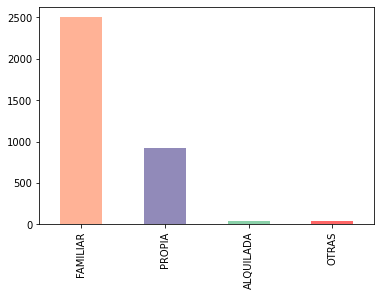

In [11]:
df_yes_mora['situacion_casa'].value_counts().plot(kind = 'bar',
color=['coral', 'darkslateblue', 'mediumseagreen', 'red'],
alpha=0.6,)
# podemos decir que los más morosos son las que pertecen 
# a una situación familiar

<AxesSubplot:>

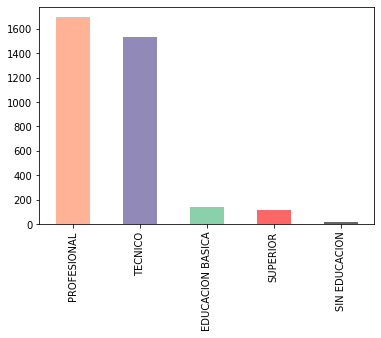

In [12]:
df_yes_mora['nivel_educativo'].value_counts().plot(kind = 'bar',
color=['coral', 'darkslateblue', 'mediumseagreen', 'red', 'black'],
alpha=0.6)
# podemos decir que los más morosos son las que pertecen 
# a un nivel educativo professional y técnico

<AxesSubplot:ylabel='Frequency'>

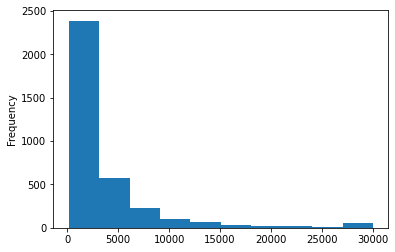

In [13]:
df_yes_mora['ingreso_mensual'].plot(kind = 'hist')
# las personas que tienen mora son las que tienen un suelo por debajo
# de los 2500 pero a medida que ganan más ya no tienen más mora

<AxesSubplot:ylabel='Density'>

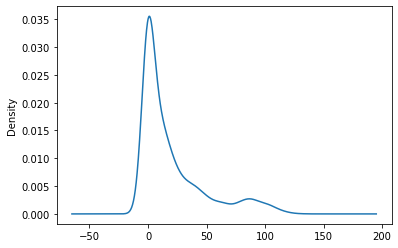

In [14]:
# personas con más tiempo tienen o no morsidad
df_yes_mora['antiguedad_tc_meses'].plot(kind = 'kde')
# los que tienen menos tiempo tienden a tener mayor morosidad

<AxesSubplot:ylabel='Frequency'>

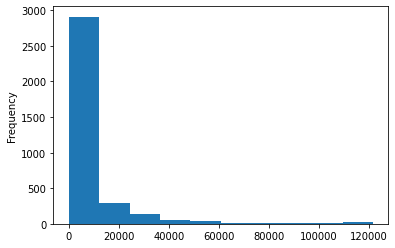

In [15]:
df_yes_mora['monto_linea_tc'].plot(kind='hist')

In [19]:
df_yes_mora['edad_binned'].value_counts().to_frame()

,edad_binned
joven,2650
adulto,820
adulto_mayor,30


In [21]:
df_yes_mora.groupby('edad_binned').mean()

,mora_60,dias_atraso_12_meses_antes,edad,antiguedad_tc_meses,producto_pasivo_12_meses_antes,ingreso_mensual,monto_linea_tc,monto_saldo_deudor_prom,score_aprob_tc,nro_veces_abono_12m_antes,riesgos_sbs
edad_binned,,,,,,,,,,,
adulto,1.000,5.741,48.816,29.013,9.930,"5,279.942","12,918.090","7,091.744",202.243,6.938,0.635
adulto_mayor,1.000,4.233,67.133,28.767,10.367,"9,077.099","15,203.428","6,129.107",217.033,5.200,0.533
joven,1.000,5.034,31.266,16.859,10.470,"3,292.970","6,242.625","5,298.220",191.052,8.043,0.613


Podemos deducir lo siguiente
1. Los jóvenes tienden a tener más mora
2. Lo jóvenes tienen mayor número de meses abonados en su trabajo pero gracias a ello nostros nos confiamos a dar un monto de linea de crédito pero su saldo deudor está por el mismo monto que su monto de linea de crédito y su ingreso mensual es de 3000 soles
3. Todos tienen un mismo días de atraso

In [ ]:
df_yes_mora

,mora_60,dias_atraso_12_meses_antes,situacion_casa,edad,fecha_ingreso_empleo,antiguedad_tc_meses,producto_pasivo_12_meses_antes,ingreso_mensual,monto_linea_tc,monto_saldo_deudor_prom,score_aprob_tc,nro_veces_abono_12m_antes,zona_geografica,riesgos_sbs,nivel_educativo,edad_binned
1500,1,245,FAMILIAR,43,2000-01-01,7,12,"29,422.000","40,603.970","13,571.590",214,0,Lima,4,PROFESIONAL,adulto
1501,1,238,FAMILIAR,40,2005-01-01,17,0,"10,000.000","25,526.760","25,526.760",185,0,Lima,4,PROFESIONAL,joven
1502,1,238,FAMILIAR,40,2005-01-01,17,0,"10,000.000","25,526.760","25,526.760",185,0,Lima,4,PROFESIONAL,joven
1503,1,219,PROPIA,39,2004-04-01,90,7,"15,000.000","14,906.780",0.000,221,0,Lima,0,PROFESIONAL,joven
1504,1,4,FAMILIAR,24,2003-06-01,0,1,"3,876.000",769.450,"35,563.700",186,0,Lima,2,TECNICO,joven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,FAMILIAR,76,2000-01-01,90,12,"30,000.000","58,083.420","19,548.240",225,0,Lima,0,SIN EDUCACION,adulto_mayor
4996,1,0,FAMILIAR,33,2000-02-01,44,12,"30,000.000",339.980,0.000,214,0,Tacna,0,PROFESIONAL,joven
4997,1,0,FAMILIAR,38,1992-09-01,102,12,"8,500.000","72,685.200","57,094.380",197,12,Piura,1,PROFESIONAL,joven
4998,1,0,PROPIA,45,1990-01-01,87,12,"30,000.000","32,161.050","26,901.420",224,12,Lima,0,PROFESIONAL,adulto


<AxesSubplot:xlabel='riesgos_sbs', ylabel='score_aprob_tc'>

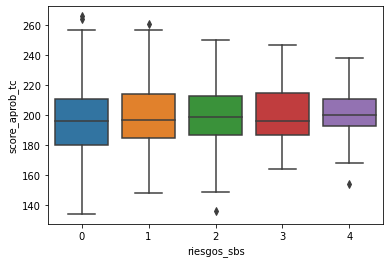

In [22]:
sns.boxplot(x = 'riesgos_sbs', y = 'score_aprob_tc', data = df_bcp)
# de aquí no podemos sacar nada de valor sustancial

<AxesSubplot:xlabel='edad_binned', ylabel='riesgos_sbs'>

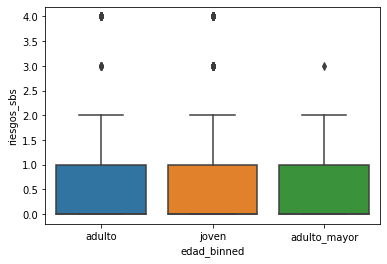

In [23]:
sns.boxplot(x = 'edad_binned', y = 'riesgos_sbs', data = df_yes_mora)
# queríamos ver si la edad es un factor para determinar si los riesgos
# varían

<AxesSubplot:xlabel='edad_binned', ylabel='ingreso_mensual'>

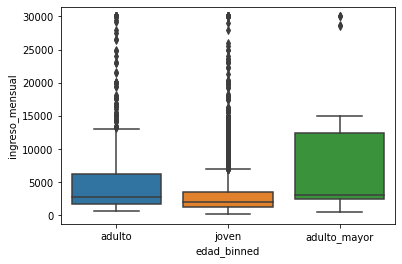

In [24]:
sns.boxplot(x = 'edad_binned', y = 'ingreso_mensual', data = df_yes_mora)
# hay más jovenes que su sueldo mensual varía en gran proporción
# ESO HACE QUE NOS CONFIEMOS DEMASIADO 
# PORQUE POR TEMPORADAS PODEMOS SUPONER ERRÓNEAMENTE

<AxesSubplot:xlabel='edad_binned', ylabel='ingreso_mensual'>

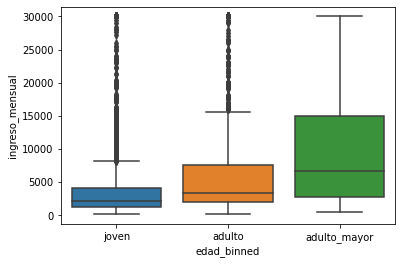

In [ ]:
sns.boxplot(x = 'edad_binned', y = 'ingreso_mensual', data = df_bcp)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=14e858d9-0539-45d5-ab0b-ac63c06705c9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>